# Movies and Ratings Exploratory Data Analysis

We eill use this dataset for a movie recommender system, so first we have to know our dataset, so in this jupyter notebook I will going to analyze it

In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Load the Movies Dataset

In [ ]:
movies = pd.read_csv('../Data/Raw/movies_metadata.csv', quotechar='"', lineterminator='\n')
print(movies.shape)
movies.head().transpose()

(86351, 27)


,0,1,2,3,4
adult,False,False,False,False,False
backdrop_path,/iZGiMD0p1M2AOmzKknFo5bkuz94.jpg,/62BnXyJtVEq4WKNSpnPG7QPYYDI.jpg,/oMGV48EGhsNavC1PL8HMeWs5Udq.jpg,/jP8lHNHD89xaRPfAdyz5KEVYcSb.jpg,/3Rfvhy1Nl6sSGJwyjb0QiZzZYlB.jpg
belongs_to_collection,NaN,NaN,NaN,NaN,"{'id': 10194, 'name': 'Toy Story Collection', ..."
budget,50000000,62000000,58000000,0,30000000
genres,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...","[{'id': 10751, 'name': 'Family'}, {'id': 28, '...","[{'id': 16, 'name': 'Animation'}, {'id': 12, '..."
homepage,NaN,NaN,NaN,NaN,http://toystory.disney.com/toy-story
id,524,9087,11860,45325,862
imdb_id,tt0112641,tt0112346,tt0114319,tt0112302,tt0114709
origin_country,['US'],['US'],['US'],['US'],['US']
original_language,en,en,en,en,en


In [270]:
movies.columns

Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'origin_country', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'movieId'],
      dtype='object')

We have 86,351 movies and 27 of it's features:

- __id__: The TMDB ID of the move.
- __adult__: Indicates if the movie is X-Rated or Adult.
- __belongs_to_collection__: A stringified dictionary that gives information on the movie series the particular film belongs to.
- __budget__: The budget of the movie in dollars.
- __genres__: A stringified list of dictionaries that list out all the genres associated with the movie.
- __homepage__: The Official Homepage of the move.
- __imdb_id__: The IMDB ID of the movie.
- __original_language__: The language in which the movie was originally shot in.
- __original_title__: The original title of the movie.
- __overview__: A brief blurb of the movie.
- __popularity__: The Popularity Score assigned by TMDB.
- __poster_path__: The URL of the poster image.
- __production_companies__: A stringified list of production companies involved with the making of the movie.
- __production_countries__: A stringified list of countries where the movie was shot/produced in.
- __release_date__: Theatrical Release Date of the movie.
- __revenue__: The total revenue of the movie in dollars.
- __runtime__: The runtime of the movie in minutes.
- __spoken_languages__: A stringified list of spoken languages in the film.
- __status__: The status of the movie (Released, To Be Released, Announced, etc.)
- __tagline__: The tagline of the movie.
- __title__: The Official Title of the movie.
- __video__: Indicates if there is a video present of the movie with TMDB.
- __vote_average__: The average rating of the movie.
- __vote_count__: The number of votes by users, as counted by TMDB.
- __backdrop_path__: The URL of the backdrop poster image.
- __origin_country__: The country were the movie was released.
- __movie_id__: The inner id of the movie

In [271]:
# Lets delete the features that are not important
movies = movies.drop(columns=['homepage', 'imdb_id', 'original_language', 'overview', 'poster_path',
       'production_countries', 'spoken_languages', 'status', 'tagline', 'video', 'backdrop_path', 'movieId'])
# Data Types
movies.dtypes

adult                       bool
belongs_to_collection     object
budget                     int64
genres                    object
id                         int64
origin_country            object
original_title            object
popularity               float64
production_companies      object
release_date              object
revenue                    int64
runtime                    int64
title                     object
vote_average             float64
vote_count                 int64
dtype: object

## ID

Lets verify that we do not have duplicated values for the ID column

In [272]:
movies[movies.duplicated('id')]['id'].count()

0

We do not have duplicated id's

## Adults

Let's see how many movies are clasified as adults

In [273]:
movies['adult'].value_counts()

adult
False    86332
True        19
Name: count, dtype: int64

We have only 19 movies clasified as adults, so this column does not contribute anything

## Belongs to Collection

As the values for this column are stringified, we will extract the collection, if it has

In [274]:
movies['belongs_to_collection'].value_counts()[:5]

belongs_to_collection
{'id': 415931, 'name': 'The Bowery Boys Collection', 'poster_path': '/q6sA4bzMT9cK7EEmXYwt7PNrL5h.jpg', 'backdrop_path': '/foe3kuiJmg5AklhtD3skWbaTMf2.jpg'}    48
{'id': 279715, 'name': 'Beck Collection', 'poster_path': '/8Kzrc2bsGt0RUyTN6vHvh4yu0QO.jpg', 'backdrop_path': '/otuz9DuwbQn5KBW5zDxund7ifiU.jpg'}               42
{'id': 123588, 'name': 'Os Trapalhões: Coleção', 'poster_path': '/ug34Rv1iINCnXbHFLLdg9yXSFsC.jpg', 'backdrop_path': '/yxe3ntTL3WVKLDm9h2RQlN1njuY.jpg'}        39
{'id': 284326, 'name': 'Wallander Collection', 'poster_path': '/zJoSKFH2hAmLU0lnDujtQV6iwuv.jpg', 'backdrop_path': '/ub2Fqc2HD1rhuxNiEROymNrTdHO.jpg'}          32
{'id': 690968, 'name': 'Mazzaropi Collection', 'poster_path': '/pVO30Orq3a9dSNVz64clL3DxlAV.jpg', 'backdrop_path': '/i9o2O8muynKirjqamTvnP6xzNn3.jpg'}          31
Name: count, dtype: int64

In [275]:
## How many movies belongs to a collection
movies['belongs_to_collection'].notna().sum()

9275

Around 11% of the movies belong to a collection. Although this feature could provide valuable information for our recommender system, the number of films in a collection is quite small. Therefore, we will remove this column.

For now, let's explore the 10 collections tha have more films.

In [276]:
def extract_dict(s):
    try:
        return ast.literal_eval(s)
    except (ValueError, SyntaxError):
        return np.nan

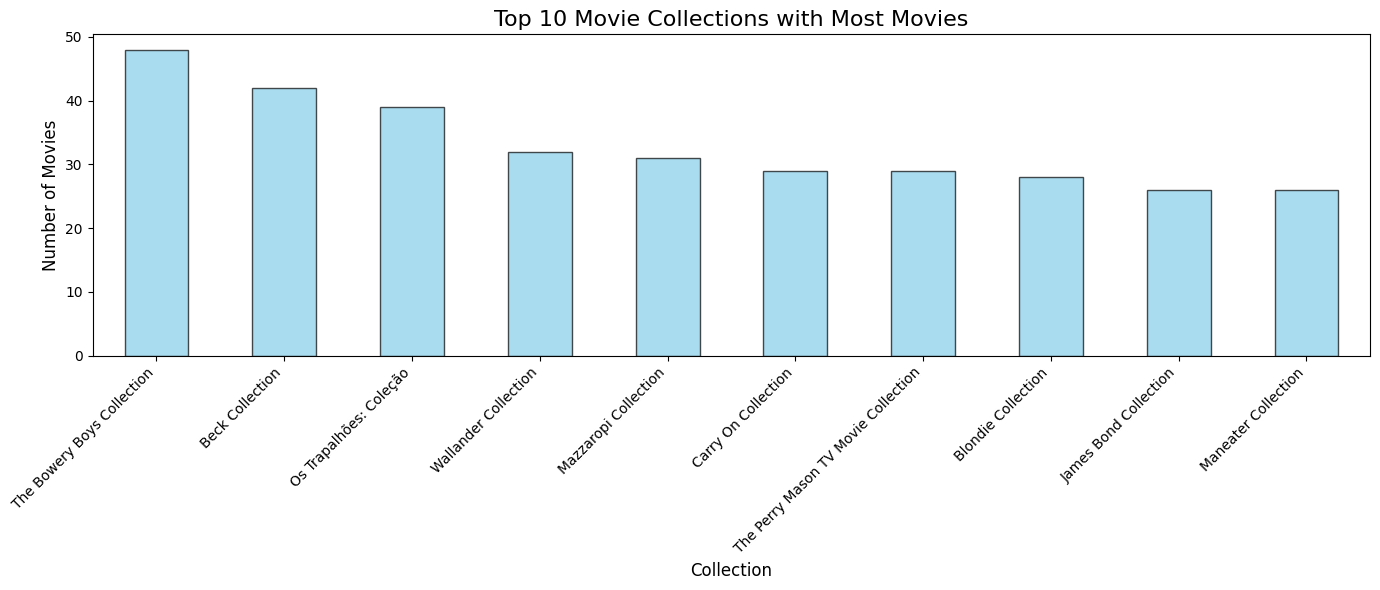

In [277]:
movies['belongs_to_collection'] = movies['belongs_to_collection'].apply(extract_dict).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
collection_counts = movies[movies['belongs_to_collection'].notna()]['belongs_to_collection'].value_counts()

# Select the 10 collections with most movies
top_collections = collection_counts.head(10)

plt.figure(figsize=(14,6))
top_collections.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Top 10 Movie Collections with Most Movies', fontsize=16)
plt.xlabel('Collection', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

To be honest, the only collection I'm familiar with is James Bond, so I can't provide any insights about the others.

## Budget
Let´s explore the budget column

In [278]:
movies[movies['budget'] == 0].shape

(70713, 15)

Almost 90% of the movies do not have information about their budget, but lets see the highest budgets of the movies that have this information.

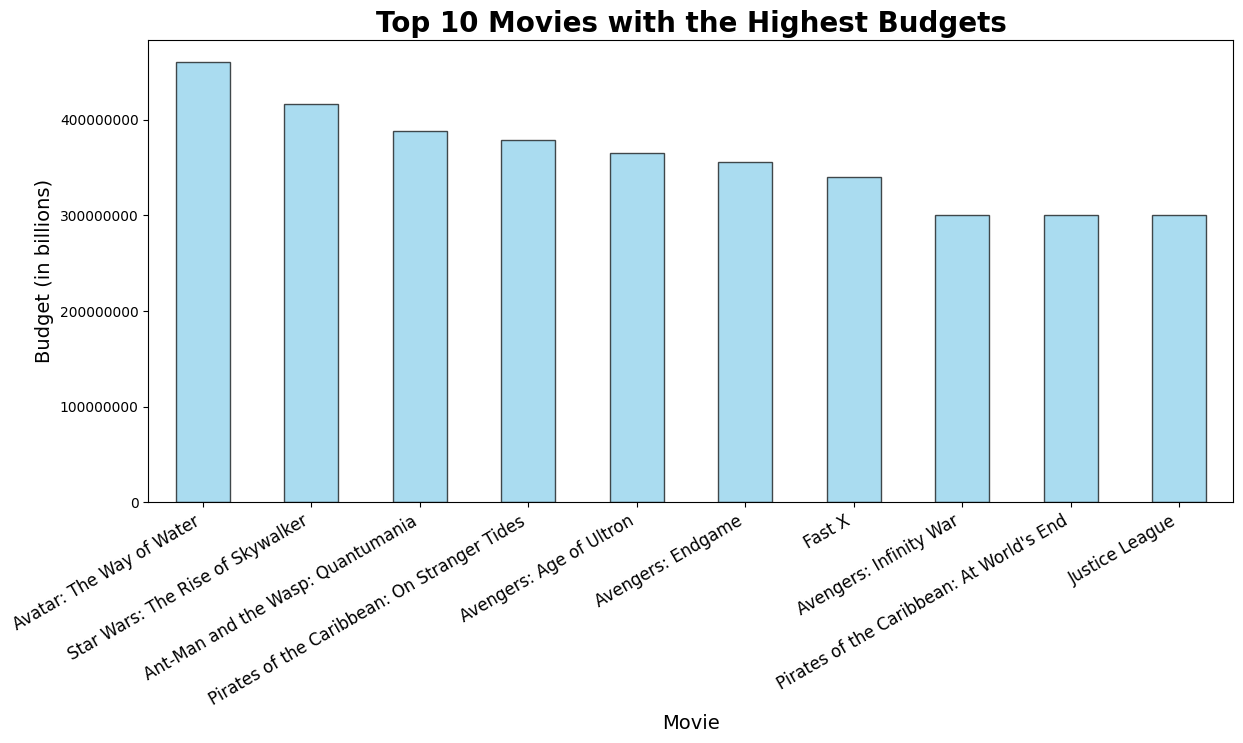

In [279]:
# Top 10 movies witht the highest budget
top_budget = movies.sort_values(by='budget', ascending=False)[['title', 'budget']].head(10)
ax = top_budget.plot(kind='bar', x='title', y='budget', color='skyblue', edgecolor='black', alpha=0.7, legend=False)

# Plot them
fig = plt.gcf() 
fig.set_size_inches(14, 6)  
plt.title("Top 10 Movies with the Highest Budgets", fontsize=20, fontweight='bold')
plt.xlabel("Movie", fontsize=14)
plt.ylabel("Budget (in billions)", fontsize=14)

plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.show()

Nine out of the ten movies with the highest budgets belong to the action genre, with the majority being science fiction, such as *Star Wars* and *Ant-Man*. This suggests that producing these types of films tends to be the most expensive compared to other genres.

## Original Title vs Title

We do not have null values for the titles columns, so lets compare both columns

In [280]:
movies[movies['original_title'] != movies['title']][['original_title', 'title']]

,original_title,title
27,摇啊摇，摇到外婆桥,Shanghai Triad
30,La Cité des Enfants Perdus,The City of Lost Children
33,"Guillaumet, les ailes du courage",Wings of Courage
55,Il postino,The Postman
56,Le Confessionnal,The Confessional
...,...,...
86338,A Invenção do Outro,The Invention of the Other
86344,Zwischen den Jahren,End of the Season
86345,El caso Monroy,The Monroy Affaire
86346,三贵情史,Flaming Cloud


## Genres

Let's change the data type of the genres from json to a list containing only the genres, so we can explore them

In [281]:
movies['genres'] = movies['genres'].apply(lambda x: ast.literal_eval(x)).apply(lambda x: [item['name'] for item in x])
movies['genres'].head()

0                            [Crime, Drama]
1                  [Comedy, Drama, Romance]
2                          [Romance, Drama]
3        [Family, Action, Adventure, Drama]
4    [Animation, Adventure, Family, Comedy]
Name: genres, dtype: object

Now let's check the movies that do not have genre

In [282]:
#  Null values
movies[movies['genres'].apply(lambda x: len(x) == 0)].shape[0]

1016

We have 1,016 films without genre, so I will remove them, since this is a very important feature for a recommender system

In [283]:
movies = movies.drop(movies[movies['genres'].apply(lambda x: len(x) == 0)].index)
movies.shape

(85335, 15)

Let's see all the genres we have and the count for each one

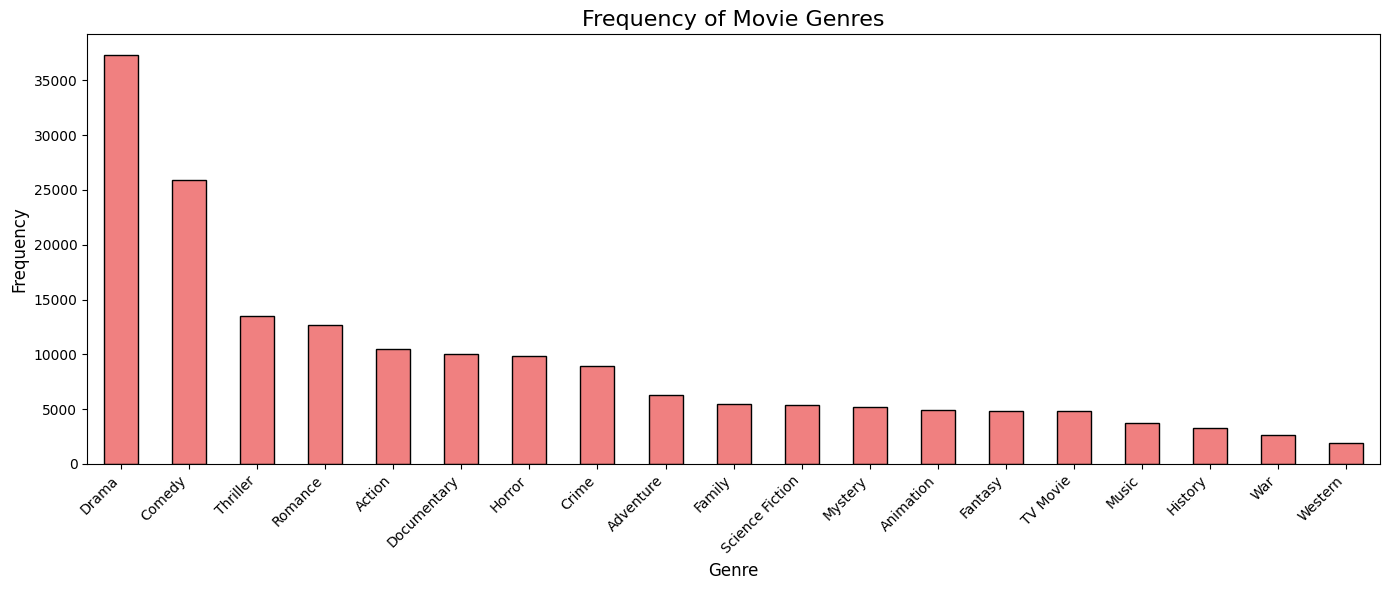

In [284]:
# Genres list
genres = pd.Series([genre for sublist in movies['genres'] for genre in sublist])
# Count the frequency of each genre
genre_counts = genres.value_counts()

# Create a bar chart for the genre counts
plt.figure(figsize=(14, 6))  
genre_counts.plot(kind='bar', color='lightcoral', edgecolor='black') 

# Add title and labels for the axes
plt.title('Frequency of Movie Genres', fontsize=16)  
plt.xlabel('Genre', fontsize=12)  
plt.ylabel('Frequency', fontsize=12) 

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As we can see, the most popular genres are Drama and Comedy, with approximately 35,000 and 25,000 films, respectively. On the other hand, the least popular genres are History, War, Western, and Foreign, each with fewer than 5,000 films.

It's important to note that when a film contains multiple genres, such as Drama and Comedy, it is counted once for each genre.

## Production Companies

This can be a very helpul feature for our recommender system, since many people watch movies that are produced by similar companies

In [285]:
movies['production_companies'].value_counts()[:10]

production_companies
[]                                                                                                                            10895
[{'id': 21, 'logo_path': '/usUnaYV6hQnlVAXP6r4HwrlLFPG.png', 'name': 'Metro-Goldwyn-Mayer', 'origin_country': 'US'}]           1029
[{'id': 174, 'logo_path': '/zhD3hhtKB5qyv7ZeL4uLpNxgMVU.png', 'name': 'Warner Bros. Pictures', 'origin_country': 'US'}]         664
[{'id': 25, 'logo_path': '/qZCc1lty5FzX30aOCVRBLzaVmcp.png', 'name': '20th Century Fox', 'origin_country': 'US'}]               598
[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UEN4CbHRc.png', 'name': 'Paramount Pictures', 'origin_country': 'US'}]              581
[{'id': 5, 'logo_path': '/71BqEFAF4V3qjjMPCpLuyJFB9A.png', 'name': 'Columbia Pictures', 'origin_country': 'US'}]                462
[{'id': 3166, 'logo_path': '/vyyv4Gy9nPqAZKElPm2izLlEaVS.png', 'name': 'Walt Disney Productions', 'origin_country': 'US'}]      431
[{'id': 6, 'logo_path': '/n53F7K9scQWFXYbrCablqLKqJdp.p

As we can see a movie can be produced by multiple companies; also the movies are in a json format, so lets extract the companies

In [286]:
movies['production_companies'] = movies['production_companies'].apply(lambda x: ast.literal_eval(x)).apply(lambda x: [item['name'] for item in x])
movies[['production_companies']]

,production_companies
0,"[Universal Pictures, Syalis DA, Légende Films,..."
1,"[Castle Rock Entertainment, Universal Pictures..."
2,"[Paramount Pictures, Constellation Films, Mira..."
3,"[Walt Disney Pictures, Painted Fence Productions]"
4,[Pixar]
...,...
86346,[]
86347,[Commonwealth United Entertainment]
86348,"[Emerald Caz Productions, Legendary Goat Produ..."
86349,"[Andisheh Pardis Jam, Katara Studios]"


Now lets check the movies that do not have a production company

In [287]:
sum(not row for row in movies['production_companies'])

10895

In [288]:
# Replace the empty lists for null values
movies['production_companies'] = movies['production_companies'].apply(lambda x: np.nan if not x else x)
movies['production_companies'].isnull().sum()

10895

In [289]:
movies.shape

(85335, 15)

In [290]:
movies[movies['production_companies'].isna()].sort_values(by='popularity', ascending=False)[['title', 'popularity']].head(10)

,title,popularity
54760,Love Rites,21.2469
85627,The Mistress,9.1437
35705,China Dolls,7.7744
79961,All Eyes Off Me,6.4054
80895,One Week Friends,5.7572
85734,King of Killers,5.5700
37917,Murari,4.9952
59292,Mama Jack,4.3372
56775,Mad World,4.3189
75139,The Unhealer,4.1547


About 12% of the films do not have data from the company that produce them. This can be a useful feature for our recommendation system, so we will leave this feature and we can do the following:

- Fill the nan values with 'unkwon'
- Change the production-companies feature to 'has_company'
- Delete it, if it is not important for the model

### Most Famous Production Companies

Now let's take a look to the most famous production companies

In [291]:
# Create a row per production Company
production = movies.explode('production_companies')
# Group By Production Company
production = production.groupby(by='production_companies').agg(
    total_popularity = ('popularity', 'mean'),
    total_revenue = ('revenue', 'sum'),
    movies_produced = ('title', 'count')
).reset_index()

production.head()

,production_companies,total_popularity,total_revenue,movies_produced
0,"""DIA"" Productions GmbH & Co. KG",2.3935,44350926,1
1,"""G"" P.C. S.A.",0.4498,1702603,1
2,"""GREEN"" Productions",0.0852,0,1
3,"""Weathering With You"" Film Partners",4.9232,186965409,1
4,#littlesecretfilm,0.4841,0,1


#### Companies that have more popularity in average per movie produced

As there can be production companies that have 1 or 2 released films with high popularity, I'll consider only the production companies that have released more than 15 films.

In [292]:
production[production['movies_produced'] > 15].sort_values(by='total_popularity', ascending=False).head(10)

,production_companies,total_popularity,total_revenue,movies_produced
18906,Heyday Films,10.977441,13888971955,29
26371,Marvel Studios,10.857739,30196335723,51
26365,Marvel Entertainment,9.958123,11426493844,26
37853,Skydance Media,8.965370,8678924160,33
16815,Genre Films,8.580217,6369413727,18
44881,Walt Disney Feature Animation,8.265124,5586736893,25
30949,Pacific Data Images,7.982759,5270407938,17
45607,WingNut Films,7.823605,7231157746,21
23710,Legendary Pictures,7.433233,14637003724,60
100,1492 Pictures,6.968504,6113471612,25


#### Companies that have more produced films

In [293]:
production.sort_values(by='movies_produced', ascending=False).head(10)

,production_companies,total_popularity,total_revenue,movies_produced
44967,Warner Bros. Pictures,1.615869,79549256066,1786
27059,Metro-Goldwyn-Mayer,0.809945,24644515479,1684
31315,Paramount Pictures,1.723777,58380405201,1337
9308,Columbia Pictures,1.775296,61216659271,1296
174,20th Century Fox,1.649304,62072985534,1242
43673,Universal Pictures,2.049600,75860613559,1241
7101,Canal+,0.806765,4546431526,792
33802,RKO Radio Pictures,0.370476,207140833,575
43578,United Artists,1.104236,7660458432,557
44886,Walt Disney Productions,0.648190,3512836121,526


#### Companies with the highest revenues

In [294]:
production.sort_values(by='total_revenue', ascending=False).head(10)

,production_companies,total_popularity,total_revenue,movies_produced
44967,Warner Bros. Pictures,1.615869,79549256066,1786
43673,Universal Pictures,2.049600,75860613559,1241
174,20th Century Fox,1.649304,62072985534,1242
9308,Columbia Pictures,1.775296,61216659271,1296
31315,Paramount Pictures,1.723777,58380405201,1337
44884,Walt Disney Pictures,4.738597,53939038766,296
26371,Marvel Studios,10.857739,30196335723,51
29094,New Line Cinema,3.321223,27792691686,343
27059,Metro-Goldwyn-Mayer,0.809945,24644515479,1684
2115,Amblin Entertainment,4.323655,19916777267,99


In [295]:
## Delete the variable to free memory
del production

## Release Date 

We will not include this column in the system, but we will use for now to explore the release years of the movies

In [296]:
year = pd.to_datetime(movies['release_date'], errors='coerce')
year = year[year.notnull()].dt.year
print(f'The oldest movie the dataset has, was released in: {year.min()}')
print(f'The latest movie the dataset has, was released in: {year.max()}')

The oldest movie the dataset has, was released in: 1874
The latest movie the dataset has, was released in: 2025


<Axes: >

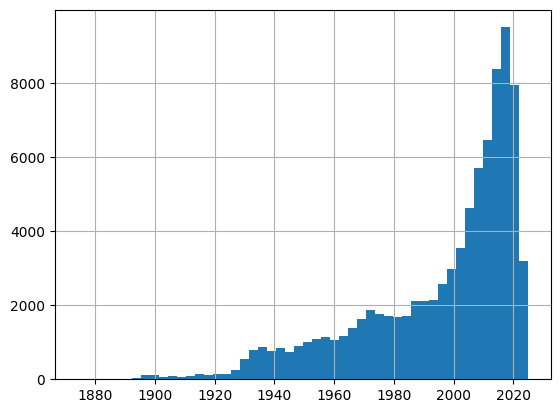

In [297]:
year.hist(bins=50)

As we can see we have films from 1874 to 2025, but the range were we have a considered amount of films is from 1995 to 2022. Since the dataset was released in 2023, but there may be some wrong values.

Let's get deeper.

In [298]:
year[year > 1995].count()

54103

Approximately 65% of the dataset is from 1995 to 2017. 

For the recommender system, we can discard movies released before 1995 and retain only the most popular movies released before 1995.

In [299]:
# Years with more films released
year_count = year.value_counts()
year_count.head(10)

release_date
2017    3235
2018    3161
2016    3108
2019    3098
2015    2993
2014    2829
2013    2564
2020    2502
2021    2352
2012    2323
Name: count, dtype: int64

As we can see the years were a lot of movies were released are from 2010 to the present.

## Popularity 

Let's remember that popularity reffers to a score of popularity assigned by TMDB, which we do not know how this score was obtained.

In [300]:
# First we have to cast the data type from string to float
movies['popularity'] = pd.to_numeric(movies['popularity'], errors='coerce') 
movies['popularity'].notnull().sum(), movies.shape[1]

(85335, 15)

Let's explore its distribution

In [301]:
movies['popularity'].describe()

count    85335.000000
mean         0.715004
std          1.569014
min          0.000000
25%          0.172000
50%          0.318900
75%          0.650800
max         56.810100
Name: popularity, dtype: float64

<Axes: ylabel='Frequency'>

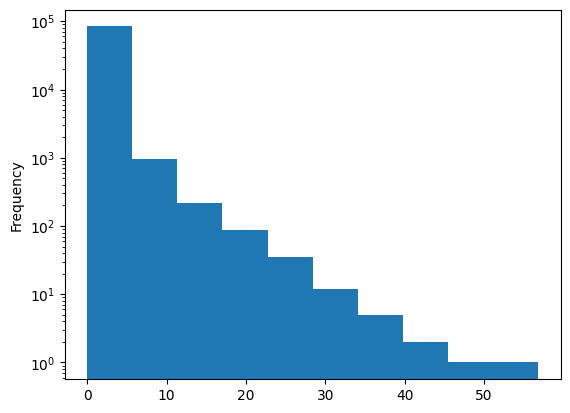

In [302]:
movies['popularity'].plot(logy=True, kind='hist')

We can see that the distribution is extremely skewed, almost all movies have a popularity score less than 10, with a mean of 0.71 and the 75% under 0.65. So we expect that the normal values of popularity is around 0 and 1.

Let's check the 15 most populars movies

In [303]:
movies.sort_values(by='popularity', ascending=False)[['title', 'popularity']].head(15)

,title,popularity
85065,My Fault,56.8101
5380,xXx,47.6440
20979,Interstellar,45.0875
58237,Wicked,41.2610
24821,Avengers: Infinity War,39.3875
314,The Shawshank Redemption,38.2989
84826,Fast X,36.9242
840,The Godfather,36.5907
10403,"The Chronicles of Narnia: The Lion, the Witch ...",34.2342
16954,The Avengers,33.6341


## Vote Count

In [304]:
movies['vote_count'].describe()

count    85335.000000
mean       266.158165
std       1252.583517
min          0.000000
25%          9.000000
50%         24.000000
75%         82.000000
max      37262.000000
Name: vote_count, dtype: float64

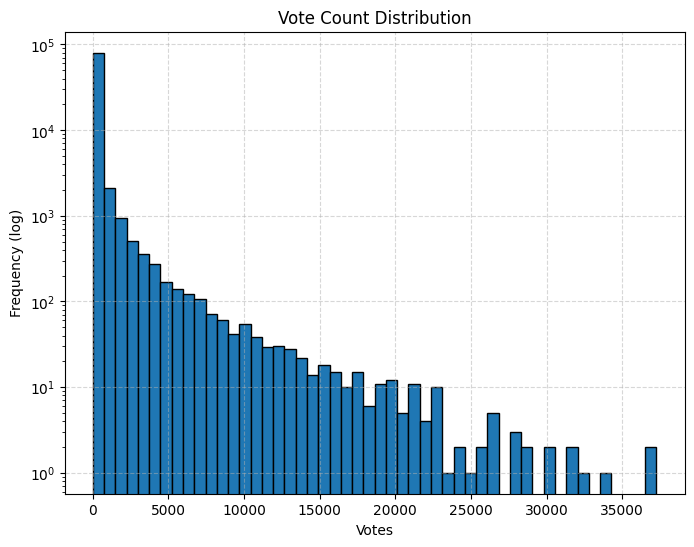

In [305]:
plt.figure(figsize=(8,6))
plt.hist(movies['vote_count'], bins=50, edgecolor='black', log=True)
plt.xlabel("Votes")
plt.ylabel("Frequency (log)")
plt.title("Vote Count Distribution")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

As with popularity, the distribution is extremely skewed, the mean (266.16) is much higher than the median (24), most of the films have few votes, but there are some with thousands of votes that increase the mean. Half of the films have 24 votes or less. This indicates that most of the films have few votes.

Now lets see the most voted films

This suggests that a small number of items are very popular, while the majority receive relatively few votes.

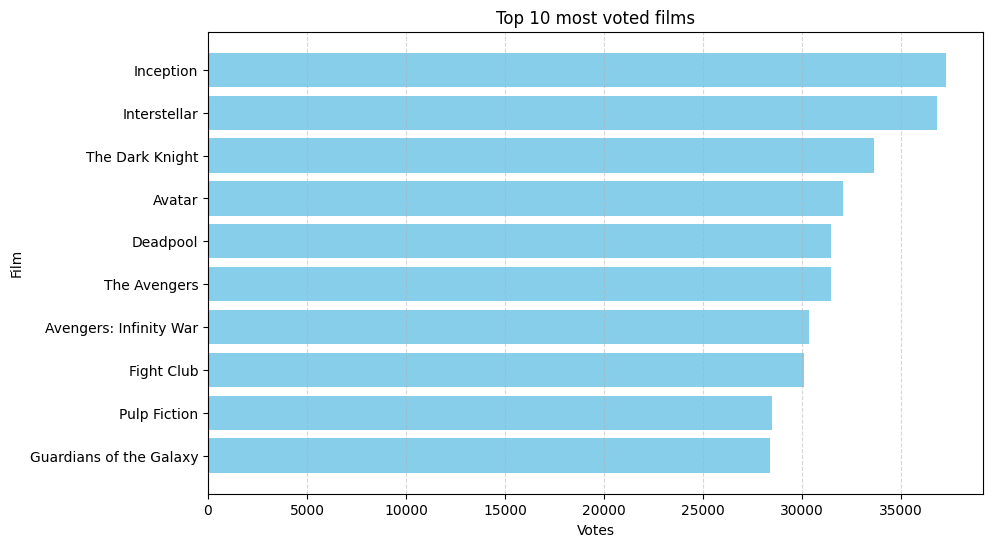

In [306]:
top_movies = movies.nlargest(10, 'vote_count')

plt.figure(figsize=(10,6))
plt.barh(top_movies['title'], top_movies['vote_count'], color='skyblue')
plt.xlabel("Votes")
plt.ylabel("Film")
plt.title("Top 10 most voted films")
plt.gca().invert_yaxis()  #
plt.grid(axis='x', linestyle="--", alpha=0.5)
plt.show()

## Vote Average

In [307]:
# Discard the movies with no votes
votes = movies[movies['vote_count'] > 0]
votes['vote_average'].describe()

count    83774.000000
mean         5.976920
std          1.167299
min          0.000000
25%          5.300000
50%          6.100000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

It seems that the vote average is normalized between 0 and 10, as we can see the mean is almost 6, the standard deviation is relatively low (1.17) and 75% of the movies have a rating of 6.8 or lower

<Axes: ylabel='Density'>

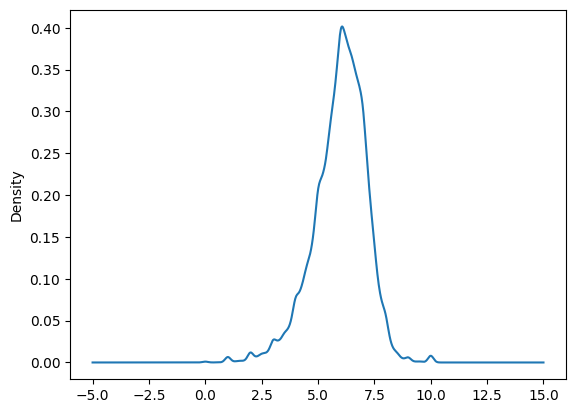

In [308]:
votes['vote_average'].plot(kind='kde')

The distribution appears to be unimodal and slightly skewed to the left, with most ratings concentrated between 5 and 7. The peak suggests that the majority of ratings are around 6, indicating that most movies receive average to slightly above-average scores. There are very few ratings below 3 or above 9, suggesting that extreme ratings are less common.

Now let's select the films with highest ratings but only if they have more than 1,500 votes

In [309]:
votes = movies[movies['vote_count'] > 1500]
votes.sort_values(by='vote_average', ascending=False)[['title', 'vote_average', 'vote_count', 'popularity']].head(15)

,title,vote_average,vote_count,popularity
314,The Shawshank Redemption,8.700,28003,38.2989
840,The Godfather,8.689,21223,36.5907
1184,The Godfather Part II,8.569,12822,17.7084
521,Schindler's List,8.566,16289,20.2365
1161,12 Angry Men,8.550,9012,13.7348
5486,Spirited Away,8.537,16955,25.1504
12170,The Dark Knight,8.519,33625,29.5713
10135,Dilwale Dulhania Le Jayenge,8.519,4471,5.6498
3035,The Green Mile,8.504,17957,18.0707
60188,Parasite,8.501,18862,23.3365


Are popularity, vote_count and vote_average related each other?

In [310]:
movies[['vote_count', 'popularity', 'vote_average']].corr()

,vote_count,popularity,vote_average
vote_count,1.000000,0.797313,0.151692
popularity,0.797313,1.000000,0.174989
vote_average,0.151692,0.174989,1.000000


As we can see, popularity and vote count are very correlated, while vote average appears to be slightly correlated.

## Runtime

Now we will explore the average runtime of the films

In [311]:
movies['runtime'].describe()

count    85335.000000
mean        91.839726
std         53.268219
min          0.000000
25%         84.000000
50%         93.000000
75%        105.000000
max      12480.000000
Name: runtime, dtype: float64

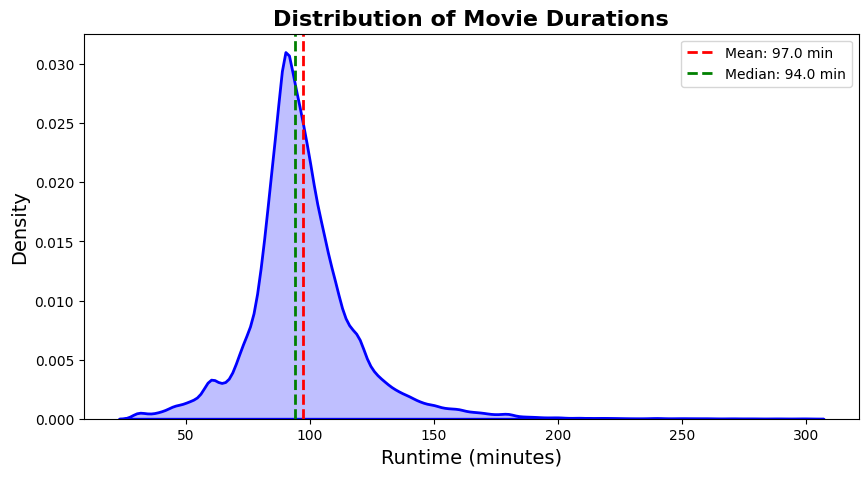

In [312]:
plt.close('all')

# Delete outliers
filtered_runtime = movies['runtime'].dropna()  # Delete NaN
filtered_runtime = filtered_runtime[(filtered_runtime >= 30) & (filtered_runtime <= 300)]

# Plot the runtimes
plt.figure(figsize=(10, 5))
sns.kdeplot(filtered_runtime, fill=True, color='blue', linewidth=2)

# Add the mean and median
mean_runtime = filtered_runtime.mean()
median_runtime = filtered_runtime.median()
plt.axvline(mean_runtime, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_runtime:.1f} min')
plt.axvline(median_runtime, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_runtime:.1f} min')

# Add the title and legends
plt.title("Distribution of Movie Durations", fontsize=16, fontweight='bold')
plt.xlabel("Runtime (minutes)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend()
plt.show()


Most movies have a runtime between 1 and 2 hours, with an average of 91.8 minutes and a median of 93 minutes. Additionally, 75% of films have a runtime of less than 105 minutes. However, the maximum runtime reaches 12,480 minutes equivalent to approximately 20 hours.

## Origin Country

Finally, let's explore the 'origin country' column to analyze the countries that produce and release movies.

In [313]:
# Extract the countries, since they are stored as a list
countries = movies['origin_country'].dropna().apply(lambda x: ast.literal_eval(x))
countries = countries.explode()
# Count the frequency of country
country_counts = countries.value_counts()[:10]
country_counts

origin_country
US    49288
GB     7300
FR     5611
CA     3769
IT     3633
JP     3020
DE     2453
IN     2283
ES     1936
RU     1196
Name: count, dtype: int64

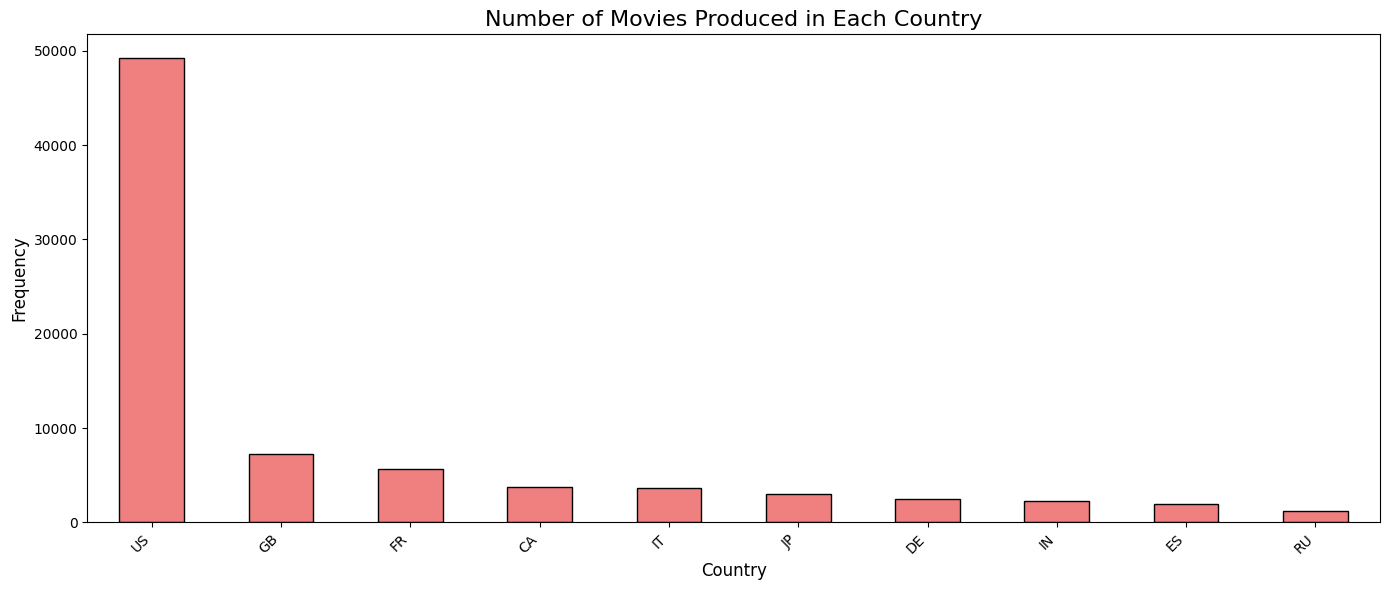

In [314]:
plt.close('all')

# Create a bar chart for the countries
plt.figure(figsize=(14, 6))  
country_counts.plot(kind='bar', color='lightcoral', edgecolor='black') 

# Add title and labels for the axes
plt.title('Number of Movies Produced in Each Country', fontsize=16)  
plt.xlabel('Country', fontsize=12)  
plt.ylabel('Frequency', fontsize=12) 

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As expected, the United States dominates film production with nearly 25,000 movies, far outpacing other countries. Following behind are Great Britain, France, and Canada, each contributing approximately 3,000 films. The middle tier includes Italy, Japan, and India, each with around 1,500 productions. Completing the top ten are Germany, Spain, and Russia, each responsible for roughly 1,000 films. This distribution clearly illustrates the disproportionate influence of American cinema on the global film industry